# NLP Utils - Text Classification example

###### News dataset (Kaggle)  https://www.kaggle.com/rmisra/news-category-dataset

### 0 - Setup

###### Import pckgs

In [2]:
from nlp_utils import *
import warnings
warnings.filterwarnings("ignore")

###### Import data

In [2]:
import json

lst_dics = []
with open('data.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )
        
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [3]:
dtf = pd.DataFrame(lst_dics)
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]
dtf = dtf.rename(columns={"category":"y", "headline":"text"})
dtf.head()

,y,text
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...


In [4]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50879 entries, 1 to 200848
Data columns (total 2 columns):
y       50879 non-null object
text    50879 non-null object
dtypes: object(2)
memory usage: 1.2+ MB


### 1 - Text Analysis

###### Look for Metadata
- language
- length
- sentiment
- extract named entities

In [5]:
extra_features = []

###### Target Variable

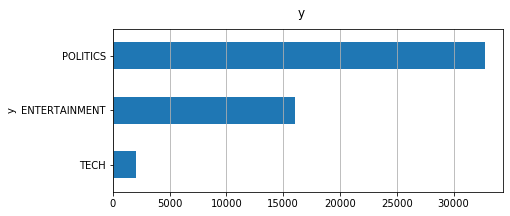

In [6]:
utils_plot_distributions(dtf, x="y", top=None, figsize=(7,3))

In [7]:
# Unbalanced

###### Language

In [8]:
# this takes a while
dtf = add_detect_lang(dtf, "text")

print(" ")
print(dtf["text"].iloc[0], " --> ", dtf["lang"].iloc[0])

      count unique top   freq
lang  50879     32  en  48957
 
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


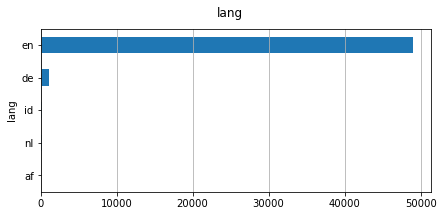

In [9]:
utils_plot_distributions(dtf, x="lang", top=5, figsize=(7,3))

In [10]:
# filter onlzy english
dtf = dtf[dtf["lang"]=="en"]

###### Length

In [11]:
dtf = add_text_count(dtf, "text")

print(" ")
print(dtf["text"].iloc[0], " --> ", dtf["word_count"].iloc[0], "|", dtf["text_length"].iloc[0])

               count       mean        std  min   25%   50%   75%    max
word_count   48957.0  10.389342   2.808540  1.0   9.0  10.0  12.0   44.0
text_length  48957.0  64.113651  16.683304  7.0  54.0  65.0  75.0  295.0
 
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  14 | 75


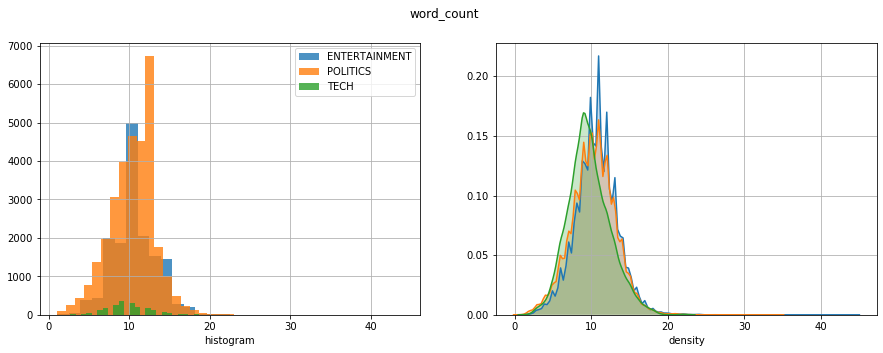

In [12]:
utils_plot_distributions(dtf, x="word_count", y="y", bins=None, figsize=(15,5))

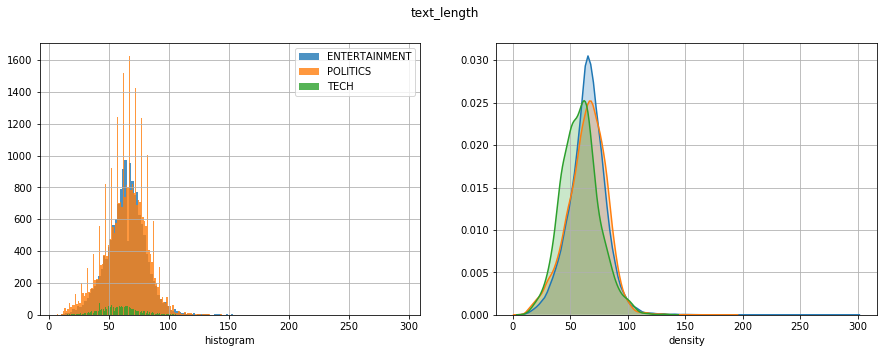

In [13]:
utils_plot_distributions(dtf, x="text_length", y="y", bins=None, figsize=(15,5))

###### Sentiment

In [14]:
dtf = add_sentiment(dtf, "text", algo="textblob", sentiment_range=(-1,1))

print(" ")
print(dtf["text"].iloc[0], " --> ", dtf["sentiment"].iloc[0])

             count      mean       std  min  25%  50%    75%  max
sentiment  48957.0  0.049633  0.257798 -1.0  0.0  0.0  0.125  1.0
 
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  0.0


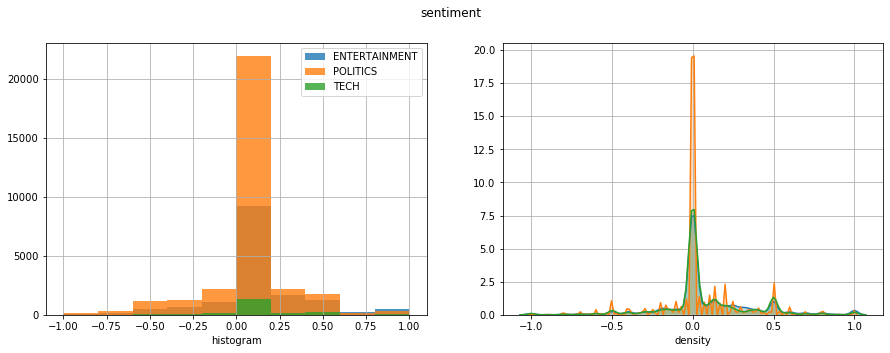

In [15]:
utils_plot_distributions(dtf, x="sentiment", y="y", bins=10, figsize=(15,5))

In [16]:
dtf = add_sentiment(dtf, "text", algo="textblob", sentiment_range=(0,1))

             count      mean       std  min  25%  50%     75%  max
sentiment  48957.0  0.524816  0.128899  0.0  0.5  0.5  0.5625  1.0


###### Ner

In [17]:
ner = spacy.load("en_core_web_lg")

In [18]:
ner_displacy(dtf["text"].iloc[0], ner=ner, lst_filter_tags=None, title=None)

In [19]:
# this takes a while
dtf = add_ner_spacy(dtf, "text", ner=ner, unique=False, create_features=True, 
                    tag_type=["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART"])

print(dtf["text"].iloc[0], " --> ", dtf["tags"].iloc[0])

--- tagging ---
--- counting tags ---
--- creating features ---
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  [{('Will Smith', 'PERSON'): 1}, {('Diplo', 'PERSON'): 1}, {('Nicky Jam', 'PERSON'): 1}, {("The 2018 World Cup's", 'EVENT'): 1}]


--- ENTERTAINMENT ---


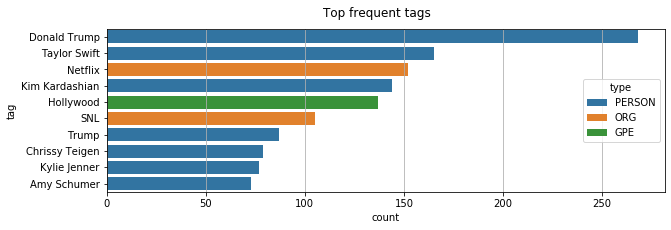

--- POLITICS ---


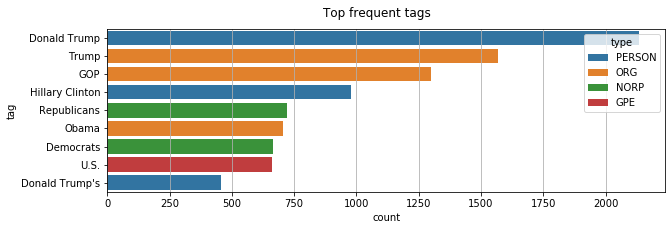

--- TECH ---


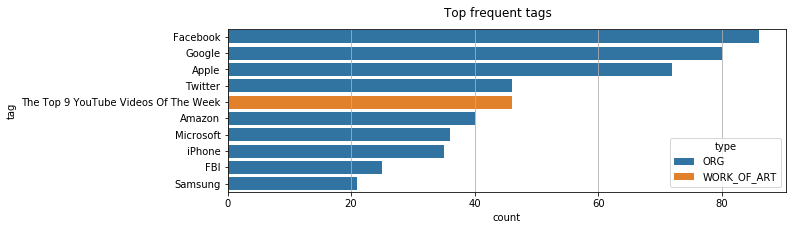

In [20]:
for y in dtf["y"].unique():
    print("---", y, "---")
    common_tags = tags_freq(dtf[dtf["y"]==y], "tags", top=10, figsize=(10,3))

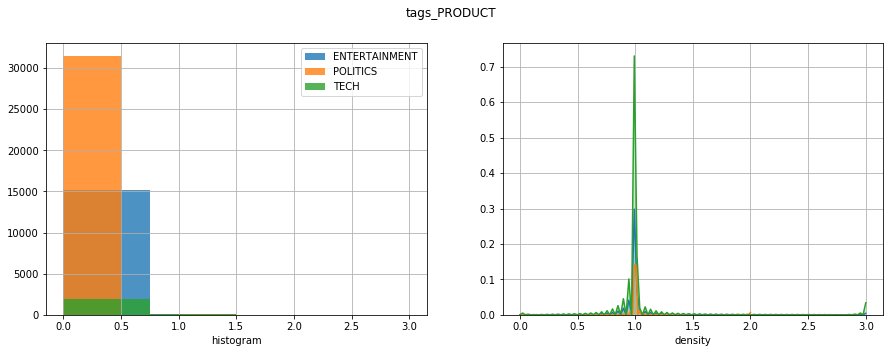

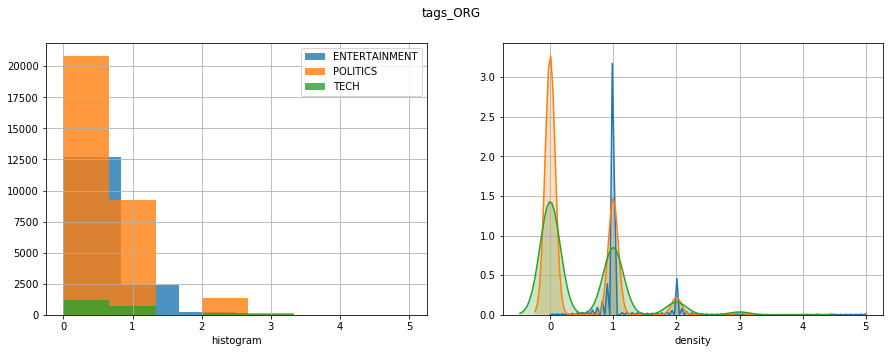

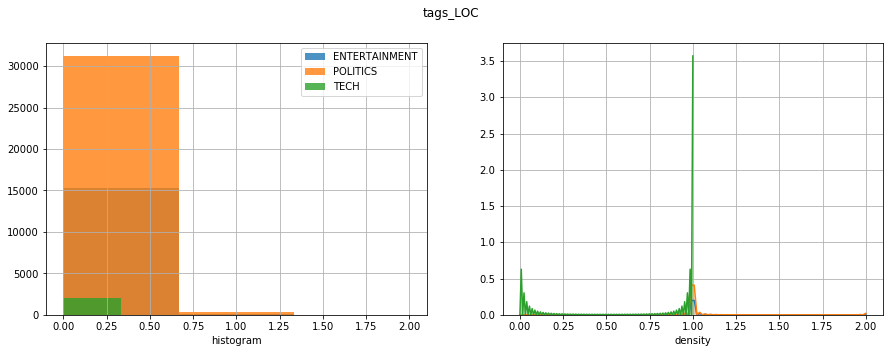

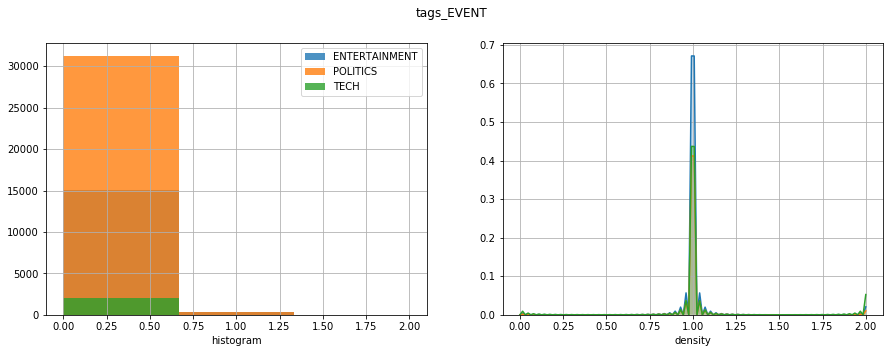

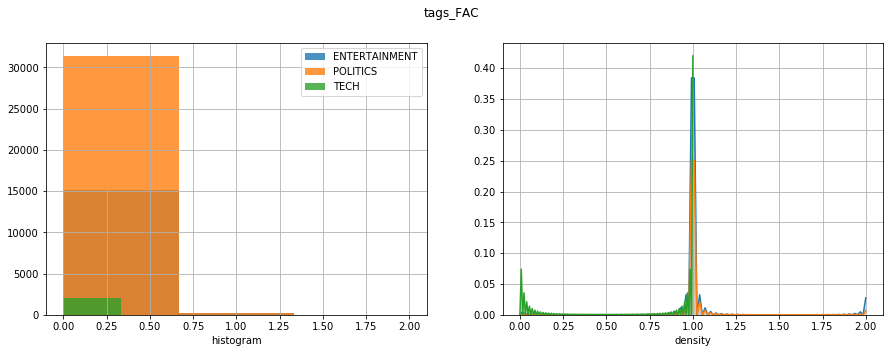

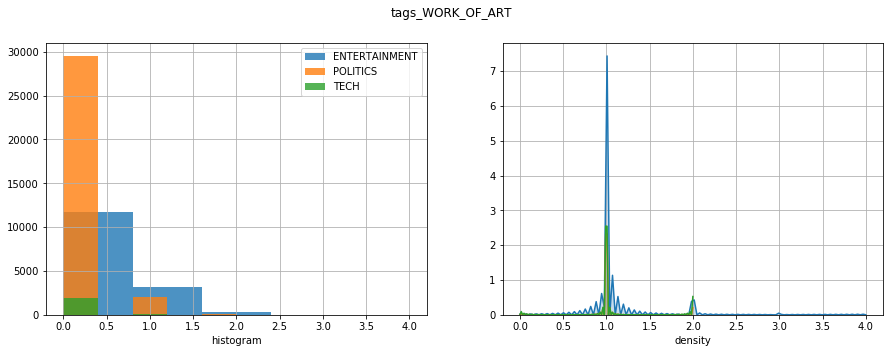

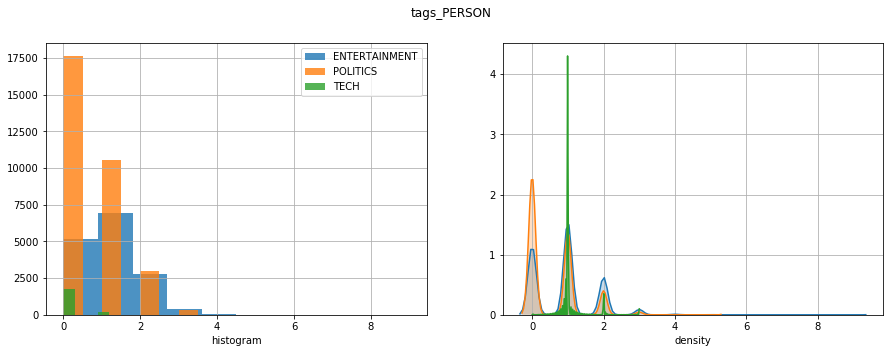

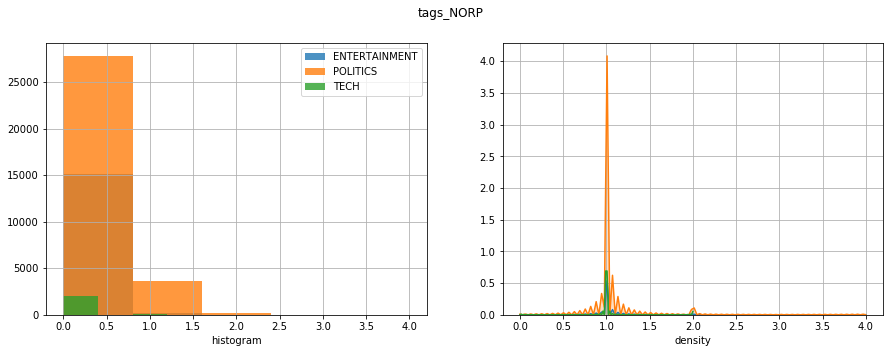

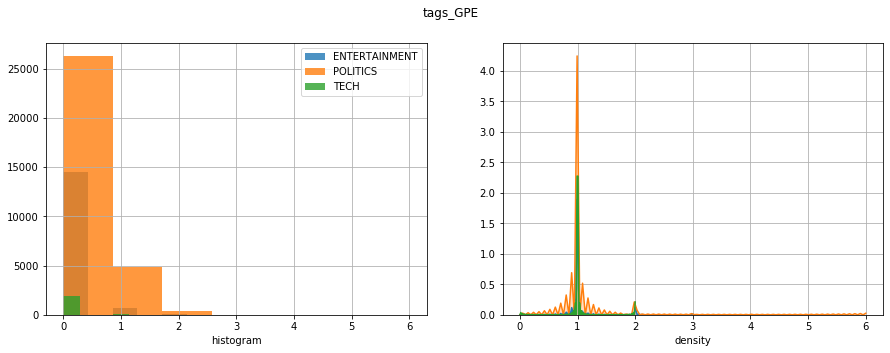

In [21]:
for x in dtf.filter(like="tags_", axis=1).columns:
    utils_plot_distributions(dtf, x=x, y="y", bins=None, figsize=(15,5))

###### Clean Words

In [22]:
lst_stopwords = create_stopwords(["english"], lst_new_words=["dtype","say","new","length","object","u","ha","wa"])

In [23]:
dtf = add_preprocessed_text(dtf, "text", lst_regex=None, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords)

print(" ")
print(dtf["text"].iloc[0], " --> ", dtf["text_clean"].iloc[0])

--- found NAs ---
                               text text_clean
10904                      What If?           
31850   This Is Us Is For All Of Us           
92381             WHO Are You Now ?           
121299                 So Now What?           
 
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  smith join diplo nicky jam 2018 world cup official song


--- ENTERTAINMENT ---


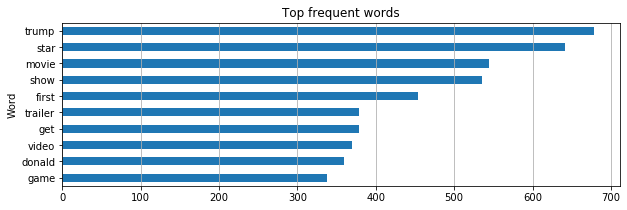

--- POLITICS ---


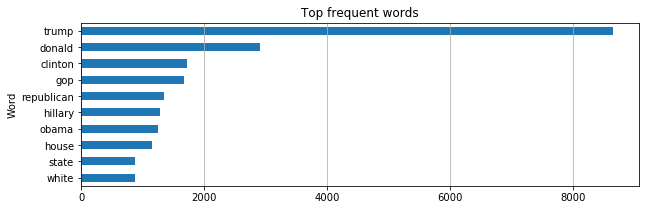

--- TECH ---


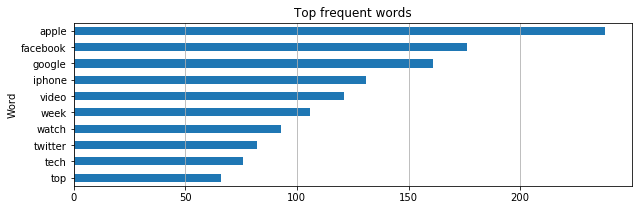

In [24]:
for y in dtf["y"].unique():
    print("---", y, "---")
    words_freq(dtf[dtf["y"]==y], "text_clean", top=10, figsize=(10,3))

--- ENTERTAINMENT ---


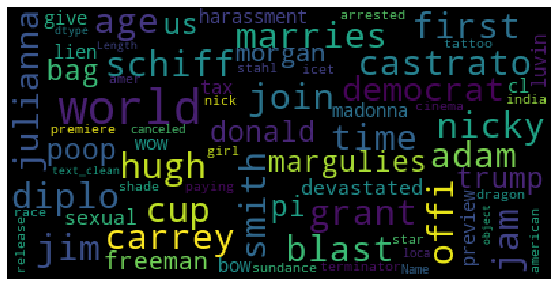

--- POLITICS ---


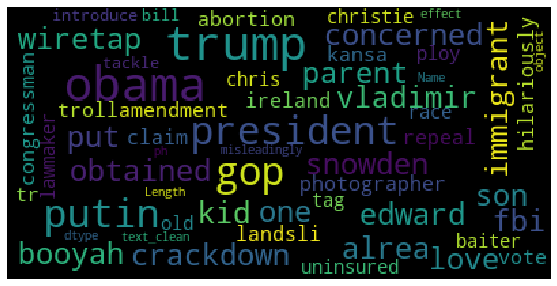

--- TECH ---


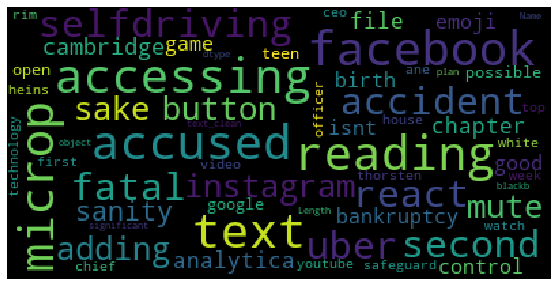

In [25]:
for y in dtf["y"].unique():
    print("---", y, "---")
    plot_wordcloud(corpus=dtf[dtf["y"]==y]["text_clean"], max_words=150, max_font_size=35, figsize=(10,5))

###### Summary

In [26]:
# keeping all features for now

### 2 - Preprocessing

###### Partitioning

In [27]:
from sklearn import model_selection

dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3, random_state=123, shuffle=False)

print("train:", dtf_train.shape)
print("test:", dtf_test.shape)

train: (34267, 17)
test: (14686, 17)


### 3 - Baseline (Bag of Words + Machine Learning)

###### Features Engineering

In [28]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

--- creating sparse matrix ---
shape: (34267, 10000)
--- creating vocabulary ---
len: 10000
--- tokenization ---
len: 34267


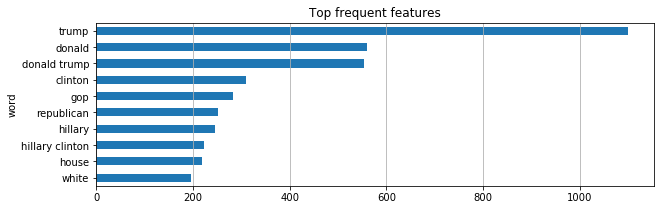

In [29]:
dic_bow = fit_bow(corpus=dtf_train["text_clean"], vectorizer=vectorizer, top=10, figsize=(10,3))

X_train, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [30]:
print("from: ", dtf_train["text_clean"].iloc[0], "| len:", len(dtf_train["text_clean"].iloc[0].split()))
print("to: ", lst_text2tokens[0], "| len:", len(lst_text2tokens[0]))
print("check: ", dtf_train["text_clean"].iloc[0].split()[0], " -- idx in vocabolary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[0].split()[0]])

from:  smith join diplo nicky jam 2018 world cup official song | len: 10
to:  [8008, 4655, 4527, 60, 9885, 2126, 6073, 8062] | len: 8
check:  smith  -- idx in vocabolary --> 8008


###### Features Selection

In [31]:
dic_features_selection = features_selection(X_train, y=dtf_train["y"], vectorizer_fitted=vectorizer, top=None)

# ENTERTAINMENT:
  . star
  . trump
  . trailer
  . movie
  . oscar
 
# POLITICS:
  . trump
  . star
  . trailer
  . movie
  . season
 
# TECH:
  . apple
  . facebook
  . google
  . iphone
  . tech
 


In [32]:
dtf_X_train = sparse2dtf(X_train, dic_vocabulary, lst_words=dic_features_selection["ALL"])

In [33]:
dtf_train = pd.concat([dtf_train, dtf_X_train.set_index(dtf_train.index)], axis=1)

print(dtf_train.shape)
dtf_train.head(3)

(34267, 3143)


,y,text,lang,word_count,text_length,sentiment,tags,tags_PRODUCT,tags_ORG,tags_LOC,...,X_maggie,X_polanski,X_teacher,X_oscar controversy,X_jane,X_winter olympics,X_learning,X_corporate,X_ariana,X_twitter
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,75,0.500000,"[{('Will Smith', 'PERSON'): 1}, {('Diplo', 'PE...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,47,0.625000,"[{('Hugh Grant Marries', 'PERSON'): 1}]",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,69,0.568182,"[{('Jim Carrey', 'PERSON'): 1}, {('Adam Schiff...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Preprocess Test

In [34]:
X_test = vectorizer.transform(dtf_test["text_clean"])
dtf_X_test = sparse2dtf(X_test, dic_vocabulary, lst_words=dic_features_selection["ALL"])

In [35]:
dtf_test = pd.concat([dtf_test, dtf_X_test.set_index(dtf_test.index)], axis=1)

print(dtf_test.shape)
dtf_test.head(3)

(14686, 3143)


,y,text,lang,word_count,text_length,sentiment,tags,tags_PRODUCT,tags_ORG,tags_LOC,...,X_maggie,X_polanski,X_teacher,X_oscar controversy,X_jane,X_winter olympics,X_learning,X_corporate,X_ariana,X_twitter
76802,POLITICS,"Stakes Are High For Clinton, GOP As Benghazi T...",en,11,63,0.515,"[{('Clinton', 'PERSON'): 1}, {('GOP', 'ORG'): ...",0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76808,POLITICS,"Bernie Sanders Meets Doc Brown, Sees The Futur...",en,11,63,0.500,"[{('Bernie Sanders', 'PERSON'): 1}, {('Jimmy K...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76809,POLITICS,Paul Ryan Officially Enters Race For Speaker O...,en,10,57,0.500,"[{('Paul Ryan', 'PERSON'): 1}, {('House', 'ORG...",0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Train

In [36]:
X_train = dtf_train.drop(["y","text","text_clean","tags","lang"], axis=1).values
y_train = dtf_train["y"].values
X_test = dtf_test.drop(["y","text","text_clean","tags","lang"], axis=1).values
y_test = dtf_test["y"].values

In [37]:
classifier = naive_bayes.MultinomialNB()

In [38]:
dic_model = ml_text_classif(X_train, y_train, X_test, y_test, preprocessing=False, vectorizer=None, classifier=classifier)
predicted_prob, predicted = dic_model["predicted_prob"], dic_model["predicted"]

True: POLITICS
Pred: POLITICS 0.9814685543419244
Accuracy (overall correct predictions): 0.81
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.93      0.75      0.83      6435
     POLITICS       0.74      0.97      0.84      7184
         TECH       0.94      0.06      0.12      1067

     accuracy                           0.81     14686
    macro avg       0.87      0.60      0.60     14686
 weighted avg       0.84      0.81      0.78     14686



###### Evaluate

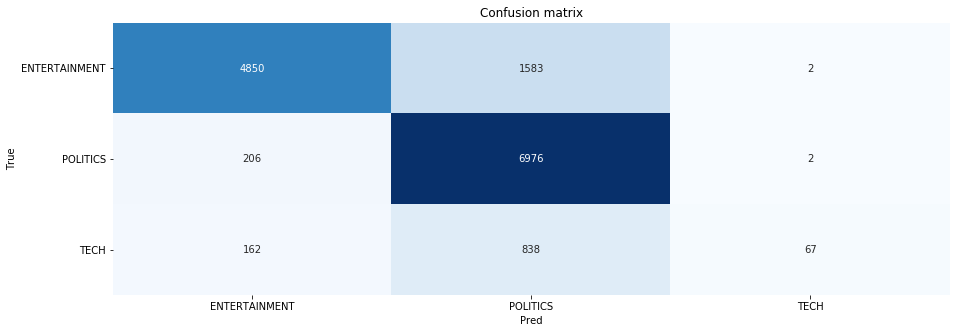

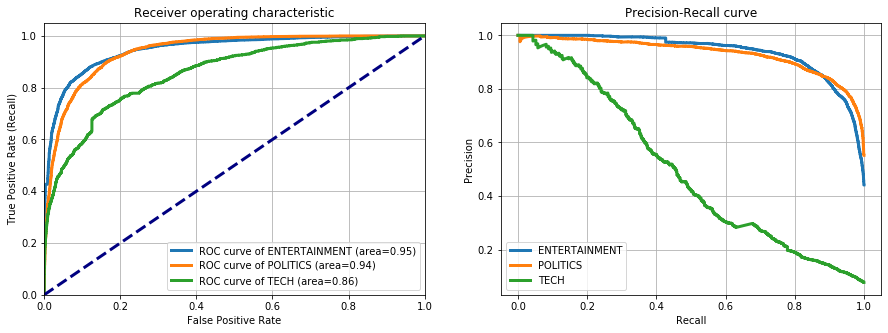

In [39]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 4 - Model Desing & Testing (pre-trained Embeddings + Deep Learning)

###### I already have:
- dtf_train --> x=text_clean, y must be encoded
- NB! I need a new vectorizer cuz the one in Baseline has ngrams=(1,2)

In [40]:
dtf_train, dic_y_mapping = encode_variable(dtf_train, "y")
print(dic_y_mapping)

{0: 'ENTERTAINMENT', 1: 'POLITICS', 2: 'TECH'}


###### Features Engineering

In [41]:
# create input for lstm (sequences of tokens)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=None, ngram_range=(1,1))

In [42]:
X_train, dic_vocabulary = text2seq(corpus=dtf_train["text_clean"], vectorizer=vectorizer)

--- creating sparse matrix ---
shape: (34267, 20623)
--- creating vocabulary ---
len: 20623
--- tokenization ---
len: 34267
--- padding to sequence ---
shape: (34267, 36)


In [43]:
print("from: ", dtf_train["text_clean"].iloc[0], "| len:", len(dtf_train["text_clean"].iloc[0].split()))
print("to: ", X_train[0], "| len:", len(X_train[0]))

from:  smith join diplo nicky jam 2018 world cup official song | len: 10
to:  [20623 20623 20623 20623 20623 20623 20623 20623 20623 20623 20623 20623
 20623 20623 20623 20623 20623 20623 20623 20623 20623 20623 20623 20623
 20623 20623 17085 10032  5432 12578  9874   203 20362  4684 12939 17231] | len: 36


In [44]:
# create weights for lstm (embeddings of tokens)
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [45]:
embeddings = vocabulary_embeddings(dic_vocabulary, nlp, dim_space=300)

shape:  (20624, 300)


In [46]:
word = dtf_train["text_clean"].iloc[0].split()[0]
print("word:", word)
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, "|vector")

word: smith
dic[word]: 17085 |idx
embeddings[idx]: (300,) |vector


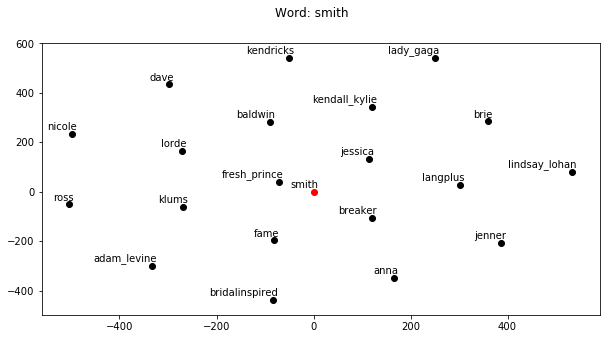

In [68]:
plot_w2v(nlp, plot_type="2d", word=word, top=20, figsize=(10,5))

###### Preprocess Test

In [48]:
X_test, _ = text2seq(corpus=dtf_test["text_clean"], vectorizer=vectorizer, vocabulary=dic_vocabulary, 
                     maxlen=X_train.shape[1])

--- creating sparse matrix ---
shape: (14686, 20623)
--- used vocabulary ---
len: 20623
--- tokenization ---
len: 14686
--- padding to sequence ---
shape: (14686, 36)


###### Train

In [49]:
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 300)           6187200   
_________________________________________________________________
lstm (LSTM)                  (None, 36)                48528     
_________________________________________________________________
dense (Dense)                (None, 3)                 111       
Total params: 6,235,839
Trainable params: 48,639
Non-trainable params: 6,187,200
_________________________________________________________________
None


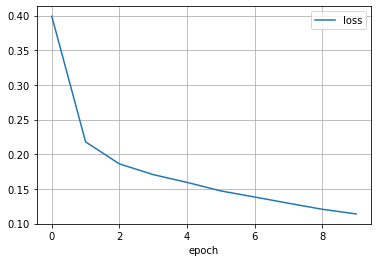

Check --> True: POLITICS Pred: POLITICS Prob: 0.9997187
Accuracy (overall correct predictions): 0.867
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.93      0.83      0.88      6435
     POLITICS       0.82      0.97      0.89      7184
         TECH       0.93      0.41      0.57      1067

     accuracy                           0.87     14686
    macro avg       0.89      0.74      0.78     14686
 weighted avg       0.88      0.87      0.86     14686



In [50]:
# this takes a while
dic_lstm = dl_text_classif(dic_y_mapping, embeddings, X_train, y_train, X_test, y_test, 
                           model=None, epochs=10, batch_size=256)

predicted_prob, predicted = dic_lstm["predicted_prob"], dic_lstm["predicted"]

###### Evaluate

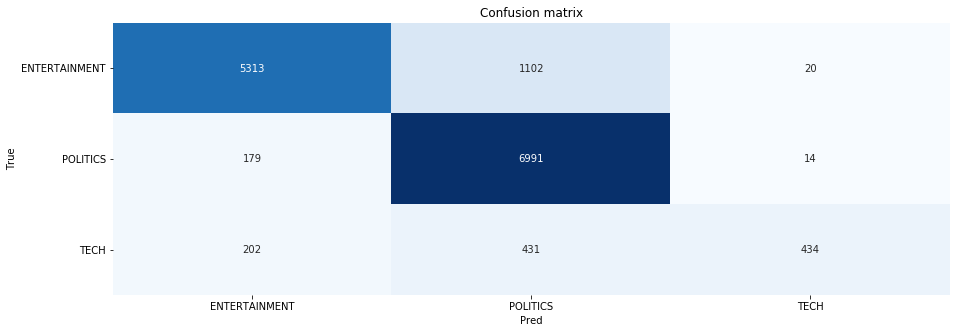

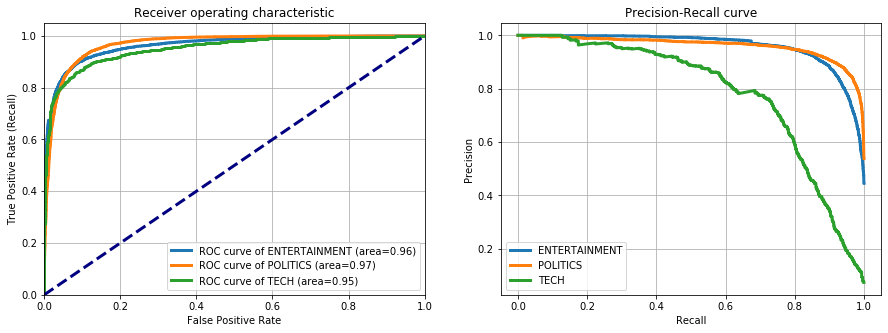

In [51]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 5 - Model Desing & Testing (training Embeddings from scratch + Deep Learning)

###### Plan:
- I will just create a new nlp model using all data
- create new Embeddings array with the new nlp model and the same vocabulary
- the rest of the process is the same as before

###### Train Word2Vec

In [52]:
np.max([len(text.split()) for text in dtf["text_clean"]]) /2 

18.0

In [53]:
lst_bigrams_stopwords = ["of","with","without","and","or","the","a"]

In [54]:
lst_corpus, nlp = fit_w2v(corpus=dtf["text_clean"], ngrams=1, min_count=1, size=300, window=18, sg=0, epochs=30, 
                          lst_bigrams_stopwords=lst_bigrams_stopwords)

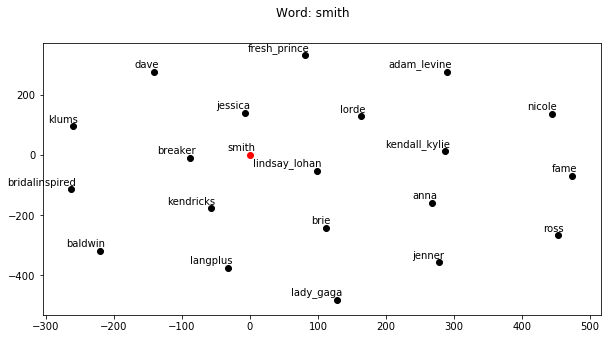

In [67]:
plot_w2v(nlp, plot_type="2d", word=word, top=20, figsize=(10,5))

In [56]:
embeddings = vocabulary_embeddings(dic_vocabulary, nlp, dim_space=300)

shape:  (20624, 300)


###### Train

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 36, 300)           6187200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 36)                48528     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 111       
Total params: 6,235,839
Trainable params: 48,639
Non-trainable params: 6,187,200
_________________________________________________________________
None


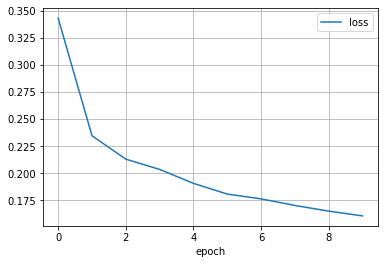

Check --> True: POLITICS Pred: POLITICS Prob: 0.9992223
Accuracy (overall correct predictions): 0.862
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.91      0.84      0.87      6435
     POLITICS       0.82      0.96      0.89      7184
         TECH       0.93      0.33      0.48      1067

     accuracy                           0.86     14686
    macro avg       0.89      0.71      0.75     14686
 weighted avg       0.87      0.86      0.85     14686



In [57]:
# this takes a while
dic_lstm = dl_text_classif(dic_y_mapping, embeddings, X_train, y_train, X_test, y_test, 
                           model=None, epochs=10, batch_size=256)

predicted_prob, predicted = dic_lstm["predicted_prob"], dic_lstm["predicted"]

###### Evaluate

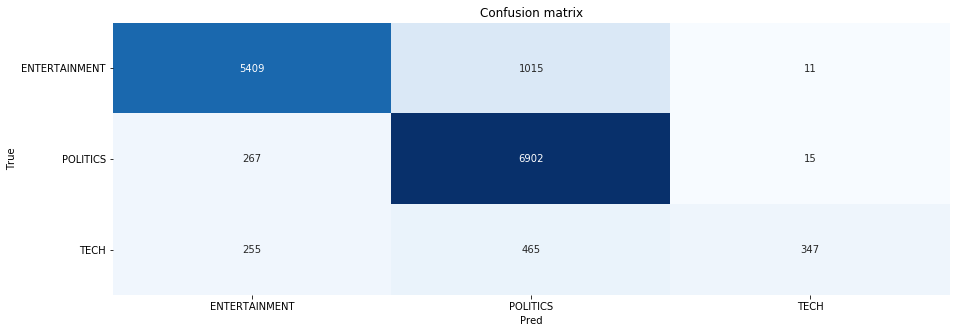

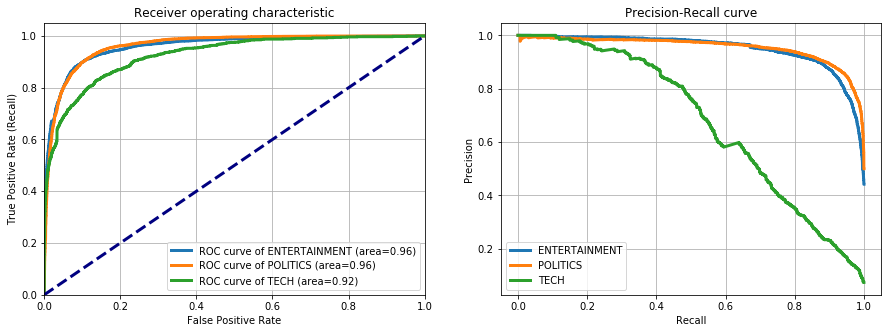

In [58]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 6 - Model Desing & Testing (Embedding + Clustering)

###### Plan:
- I will use the nlp model to create clusters for the classes
- then convert news into vectors and calculate distances

######  Create Clusters

In [59]:
# from the Baseline step
dic_clusters = {}
for y,lst_keywords in dic_features_selection.items():
    if y != "ALL":
        lst_grams = []
        for gram in lst_keywords:
            if len(gram.split())>1:
                lst_grams.append("_".join(gram.split()))
            else:
                lst_grams.append(gram)
        dic_clusters.update({y:lst_grams})

In [60]:
for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...")

ENTERTAINMENT :  ['star', 'trump', 'trailer', 'movie', 'oscar'] ...
POLITICS :  ['trump', 'star', 'trailer', 'movie', 'season'] ...
TECH :  ['apple', 'facebook', 'google', 'iphone', 'tech'] ...


###### Fit PCA

In [61]:
pca = fit_pca_w2v(corpus=dtf_train["text_clean"], nlp=nlp)

X shape: (34267, 300)
pca shape: (34267, 300)


###### Predict Clusters

In [65]:
predicted_prob, predicted = predict_clusters_w2v(corpus=dtf_test["text_clean"], dic_clusters=dic_clusters, 
                                                 nlp=nlp, pca=None)

print("Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_test, predicted),3))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

--- embedding X and y ---
ENTERTAINMENT shape: (300,)
POLITICS shape: (300,)
TECH shape: (300,)
X shape: (14686, 300)
--- computing similarity ---
Accuracy (overall correct predictions): 0.531
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.89      0.72      0.80      6435
     POLITICS       0.64      0.33      0.43      7184
         TECH       0.14      0.74      0.23      1067

     accuracy                           0.53     14686
    macro avg       0.56      0.60      0.49     14686
 weighted avg       0.71      0.53      0.58     14686



###### Evaluate

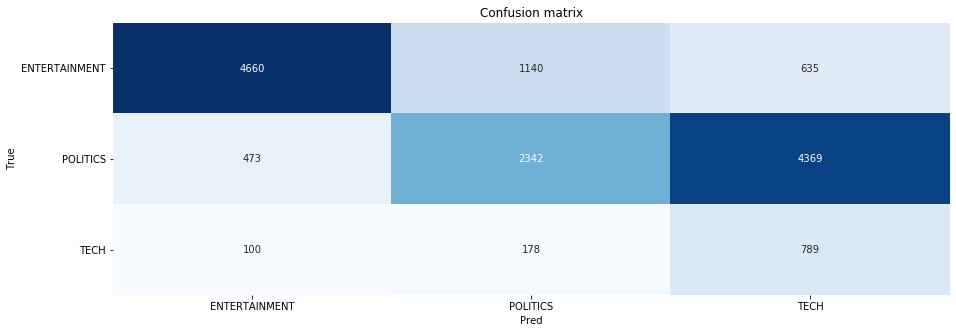

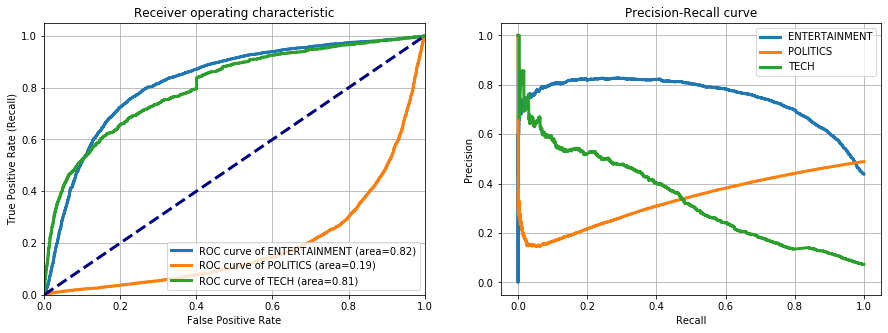

In [66]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))